In [1]:
# show the time patterns and rate of increase (or rate of increase of rate of increase)
# is the same in the historical as it is in Seattle temps - so I could use those constants
# the yearly/ seasonally/ accelaration to predict Seattle temps from the past temperatures

# TO DO:
# 1) get stationary usable time series info for both
# 2) which should leave you with the change over time not attributed to those
# 3) use the rate of change of the change from Hx data to predict how much the rate 
# for Seattle will change
# 4) use the time series info to predict future temperatures

# NOTE: these are temperature anomalies already ... do you want to work with those?
# you could potentially use the rate of change of change on the anomalies to predict 
# all temperatures ...

# OR ... look for data on how the temperature anomalies reflect / interact with temperature

# could also see how the change in anomalies (or rate of change in anomalies) differs
# in different areas in comparison to world wide ... if there is similar time range data

In [2]:
# work with Seattle data first - we can maybe find better "other data sets"

# take daily data you have below and get out - yearly, seasonally

# should leave you with an increasing line, which would have a rate of increase, and a rate of change of rate of
# increase (first and second derivatives I believe)

# could make it interactive by letting people ask questions about it (query the data)

In [250]:
import pandas as pd
from matplotlib import pyplot as plt

#make it pretty
plt.style.use('ggplot')

%matplotlib inline

 data set documentation: https://www.ncdc.noaa.gov/cdo-web/datasets#LCD

 I got LCD (CSV)s - LCD (local climate data) documentation - https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/LCD_documentation.pdf

 The National Research Council (NRC) defines a CDR as a time series of measurements of sufficient length, consistency, and continuity to determine climate variability and change.
 
 data from search : https://www.ncdc.noaa.gov/cdo-web/datatools/lcd



In [289]:
# unless otherwise noted :  data sets are 2009 June 1 - 2019 May 31 = dataset 2009
df_2009 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1749343.csv", low_memory=False)
df_1999 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1749348.csv", low_memory=False)
df_1989 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1749350.csv", low_memory=False)
# 1973 - 1979
df_1973 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1979.csv", low_memory=False)
# 1964 - 1973 - no idea why they weren't in the other data sets ...
df_missing = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/test.csv", low_memory=False)
# 1959 - 1964
df_1959 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1969.csv", low_memory=False)
df_1949 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1959.csv", low_memory=False)
# october 1943 - May 31 1949
df_1943 = pd.read_csv("/Users/sarahburgart/galvanize/week4 - capstone 1/data/1949.csv", low_memory=False)



In [295]:
# list of all column names
# len(list(df_2009.columns.values))

# testing for extant dates in datasets
# df_missing["DATE"]

# list of all column names and data types - object = multiple data types

#df_2009.info(max_cols=512)

df_2009.max()

# could be of interest = DailyDepartureFromNormalAverageTemperature 
# DailyPrecipitation
# HourlyRelativeHumidity 
# MonthlyDepartureFromNormalPrecipitation
# measure variability within day, month, year and if that has changed significantly in last 50ish years
# predict persipitaiton  - HourlyDewPointTemperature , HourlyRelativeHumidity , 

# monthly
# - MonthlyMeanTemperature  
# - MonthlyMinimumTemperature
# - MonthlyMaximumTemperature

# df_2009_DD = df_2009[df_2009["DailyDepartureFromNormalAverageTemperature"].notnull()]

# df_2009_DDFNAT = df_2009_DD[["DATE","DailyDepartureFromNormalAverageTemperature"]]
# df_2009_DDFNAT.sort_values(by=["DailyDepartureFromNormalAverageTemperature"], axis=0, ascending=False).max()

#filtered_df = df[df['name'].notnull()]

STATION                                        72793524234
DATE                                   2019-05-18T20:53:00
REPORT_TYPE                                          SOM  
SOURCE                                                   O
AWND                                                   7.4
BackupDirection                                        NaN
BackupDistance                                         NaN
BackupDistanceUnit                                     NaN
BackupElements                                         NaN
BackupElevation                                        NaN
BackupElevationUnit                                    NaN
BackupEquipment                                        NaN
BackupLatitude                                         NaN
BackupLongitude                                        NaN
BackupName                                             NaN
CDSD                                                   648
CLDD                                                   2

In [294]:
# clean data set of null values for one column
# returns new dataframe

def no_more_null (df, column_not_null):

    df_mask = df[column_name].notnull()

    new_df = pd.DataFrame(df[df_mask])
    
    return new_df



def year_month_cols (df):

    #data[["DATE","MonthlyMeanTemperature"]]

    # need to group Date by year to plot
    df['year'] = pd.DatetimeIndex(df['DATE']).year
    df['month'] = pd.DatetimeIndex(df['DATE']).month
    
    return df
    
# df_year = df_mask.groupby(['year','month'])
# df_ymm = df_year[["year","month", "MonthlyMeanTemperature"]]
# df_ymm.head()


In [109]:
# this is a groupby object and it won't let us make it into a df for some reason
df_ymm2 = df_year["MonthlyMeanTemperature"]

In [125]:
# .last aggregate function -prefunctionary - bc it was complaining
grouped_sorted_df = pd.DataFrame(df_ymm2.last())


In [128]:
# year and month were indexes and so reset_index = new index and those are columns again
new_df = grouped_sorted_df.reset_index(['year', 'month'])

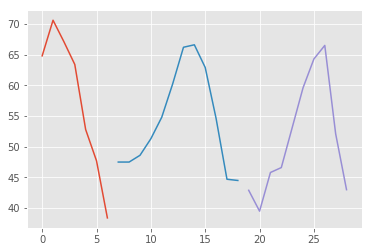

In [136]:
# now year is not an index we can search it / sort by it
(new_df[new_df['year'] == 2009]["MonthlyMeanTemperature"]).plot()
(new_df[new_df['year'] == 2010]["MonthlyMeanTemperature"]).plot()
(new_df[new_df['year'] == 2011]["MonthlyMeanTemperature"]).plot()

In [104]:
df_year = df_mask.groupby(['year','month'])
grouped_series = pd.Series(df_year['MonthlyMeanTemperature'])

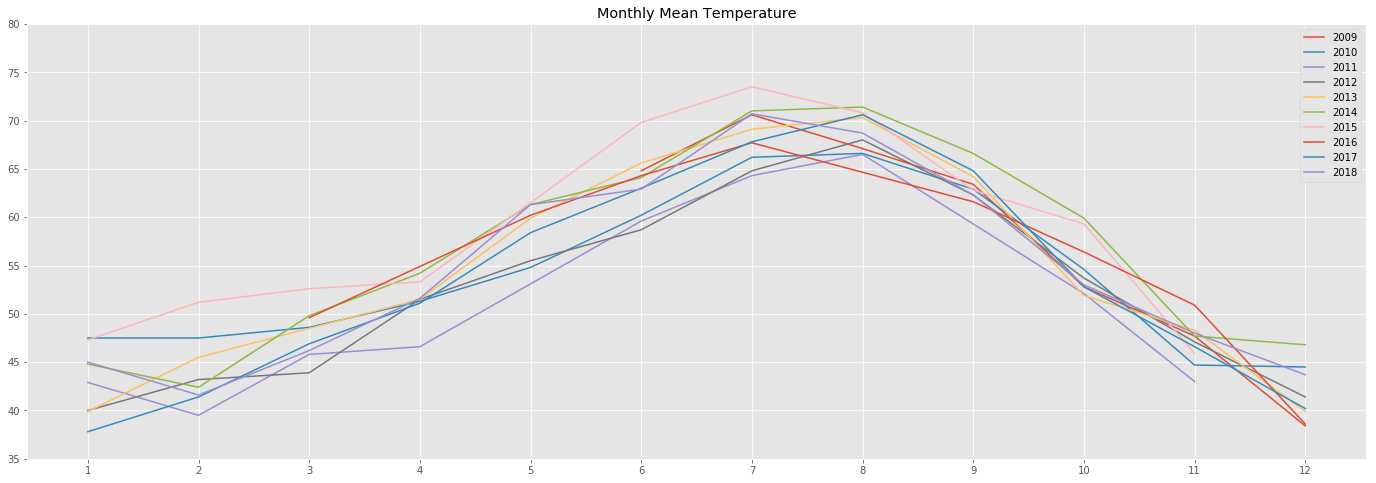

In [160]:

# one year - all months, monthly mean temperature

# df.loc[df['column_name'] == some_value]

#df_ymm[df_ymm["year"] == 2018]
#df_2018.head()

# plot MonthlyMeanTemperature against month for one year
fig, ax = plt.subplots(1, 1, figsize=(24, 8))
ax.plot(new_df[new_df['year'] == 2009]['month'], new_df[new_df['year'] == 2009]["MonthlyMeanTemperature"], label = "2009")
ax.plot(new_df[new_df['year'] == 2010]['month'], new_df[new_df['year'] == 2010]["MonthlyMeanTemperature"], label = "2010")
ax.plot(new_df[new_df['year'] == 2011]['month'], new_df[new_df['year'] == 2011]["MonthlyMeanTemperature"], label = "2011")
ax.plot(new_df[new_df['year'] == 2012]['month'], new_df[new_df['year'] == 2012]["MonthlyMeanTemperature"], label = "2012")
ax.plot(new_df[new_df['year'] == 2013]['month'], new_df[new_df['year'] == 2013]["MonthlyMeanTemperature"], label = "2013")
ax.plot(new_df[new_df['year'] == 2014]['month'], new_df[new_df['year'] == 2014]["MonthlyMeanTemperature"], label = "2014")
ax.plot(new_df[new_df['year'] == 2015]['month'], new_df[new_df['year'] == 2015]["MonthlyMeanTemperature"], label = "2015")
ax.plot(new_df[new_df['year'] == 2016]['month'], new_df[new_df['year'] == 2016]["MonthlyMeanTemperature"], label = "2016")
ax.plot(new_df[new_df['year'] == 2017]['month'], new_df[new_df['year'] == 2017]["MonthlyMeanTemperature"], label = "2017")
ax.plot(new_df[new_df['year'] == 2018]['month'], new_df[new_df['year'] == 2018]["MonthlyMeanTemperature"], label = "2018")


ax.set_yticks([35,40,45,50,55,60,65,70,75,80])

ax.set_xticks(new_df[new_df['year'] == 2012]['month'])
ax.set_title("Monthly Mean Temperature")
ax.legend(loc='best')

plt.show()

# overylay year on year

#df_MMT["DATE", "MonthlyMeanTemperature"]

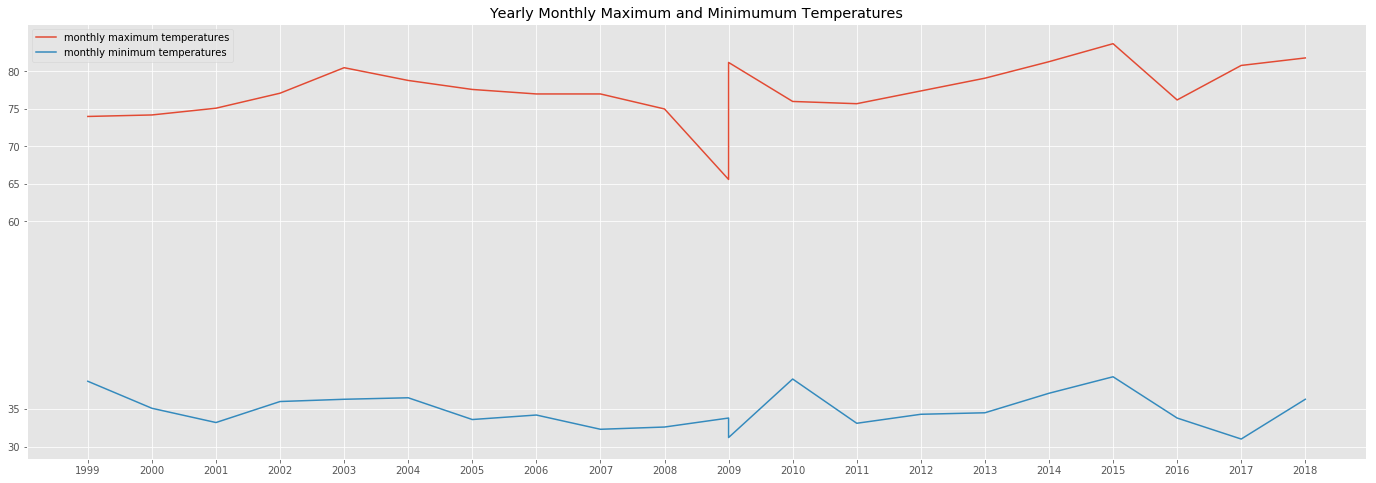

In [252]:
df_max = df_2009

df_max["year"] = pd.DatetimeIndex(df_max['DATE']).year
df_max['month'] = pd.DatetimeIndex(df_max['DATE']).month

df_max_year = df_max.groupby(["year"])
df_max_year["MonthlyMaximumTemperature"].max()
MMT_2009 = pd.DataFrame(df_max_year["MonthlyMaximumTemperature"].max())
MMT_2009

####

df2_max = df_1999

df2_max["year"] = pd.DatetimeIndex(df2_max['DATE']).year
df2_max['month'] = pd.DatetimeIndex(df2_max['DATE']).month

df2_max_year = df2_max.groupby(["year"])
df2_max_year["MonthlyMaximumTemperature"].max()
MMT_1999 = pd.DataFrame(df2_max_year["MonthlyMaximumTemperature"].max())
MMT_1999
all_max = MMT_1999.append(MMT_2009)
all_max = all_max.reset_index(["year"])

####
# not enough data here from pre 1999

###

# add in monthly minimum temperatures
df_min = df_2009

df_min["year"] = pd.DatetimeIndex(df_min['DATE']).year
df_min['month'] = pd.DatetimeIndex(df_min['DATE']).month

df_min_year = df_min.groupby(["year"])
df_min_year["MonthlyMinimumTemperature"].min()
MinMT_2009 = pd.DataFrame(df_min_year["MonthlyMinimumTemperature"].min())
MinMT_2009

df2_min = df_1999

df2_min["year"] = pd.DatetimeIndex(df2_min['DATE']).year
df2_min['month'] = pd.DatetimeIndex(df2_min['DATE']).month

df2_min_year = df2_min.groupby(["year"])
df2_min_year["MonthlyMinimumTemperature"].min()
MinMT_1999 = pd.DataFrame(df2_min_year["MonthlyMinimumTemperature"].min())
all_min = MinMT_1999.append(MinMT_2009)
all_min = all_min.reset_index(["year"])

# plot max monthly temperatures
fig, ax = plt.subplots(1, 1, figsize=(24, 8))
ax.plot(all_max["year"], all_max["MonthlyMaximumTemperature"], label = "monthly maximum temperatures")
ax.plot(all_min["year"], all_min["MonthlyMinimumTemperature"], label = "monthly minimum temperatures")


ax.set_yticks([30, 35, 60,65,70,75,80])

ax.set_xticks([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
ax.set_title("Yearly Monthly Maximum and Minimumum Temperatures")
ax.legend(loc='best')

plt.show()

#all_min

In [221]:
# plot by day and by monthly mean temperature 

# compare variances of months

# plot difference between max and min for each month

# could compare to hourly wet bulb temperature / hourly dry bulb temperature

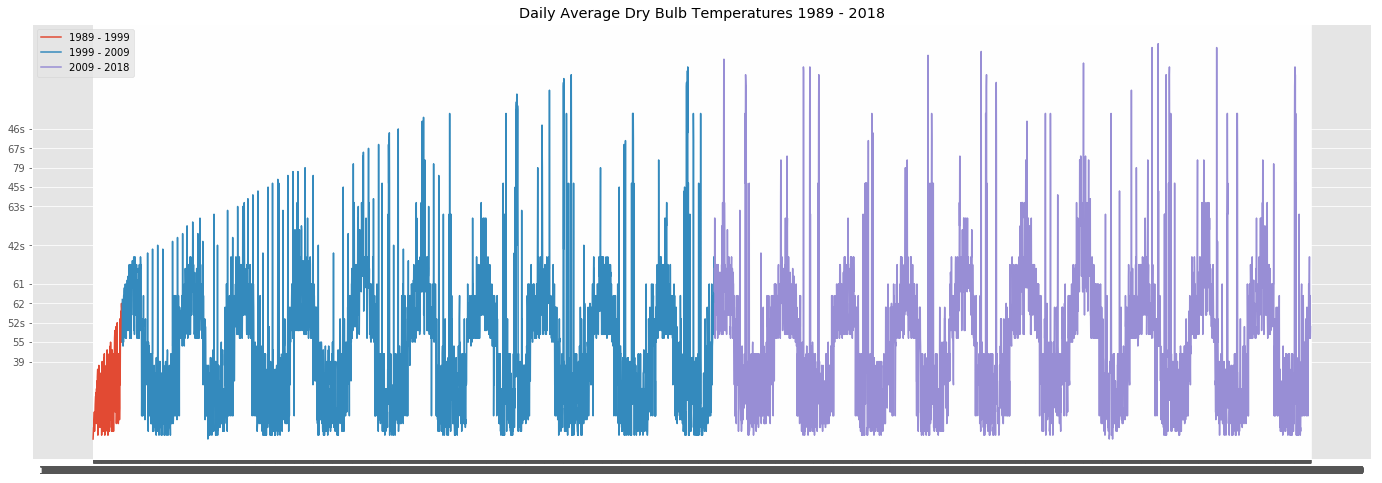

In [254]:
# could plot the daily average dry bulb temperature
ave_temp_1989 = df_1989[df_1989["DailyAverageDryBulbTemperature"].notnull()][["DATE", "DailyAverageDryBulbTemperature"]]
ave_temp_1999 = df_1999[df_1999["DailyAverageDryBulbTemperature"].notnull()][["DATE", "DailyAverageDryBulbTemperature"]]
ave_temp_2009 = df_2009[df_2009["DailyAverageDryBulbTemperature"].notnull()][["DATE", "DailyAverageDryBulbTemperature"]]

fig, ax = plt.subplots(1, 1, figsize=(24, 8))
ax.plot(ave_temp_1989["DATE"], ave_temp_1989["DailyAverageDryBulbTemperature"], label= "1989 - 1999")
ax.plot(ave_temp_1999["DATE"], ave_temp_1999["DailyAverageDryBulbTemperature"], label= "1999 - 2009")
ax.plot(ave_temp_2009["DATE"], ave_temp_2009["DailyAverageDryBulbTemperature"], label= "2009 - 2018")
#ax.plot(all_min["year"], all_min["MonthlyMinimumTemperature"], label = "monthly minimum temperatures")
ax.set_title("Daily Average Dry Bulb Temperatures 1989 - 2018")

ax.set_yticks([20, 25, 30, 35, 40, 50, 60,65,70,75,80])

#ax.set_xticks()
ax.legend(loc='best')

plt.show()

# this took a very very very long time to plot

# change x - axis to months so they overlay

# change y - axis to be readable

#The dry-bulb temperature (DBT) is the temperature of air measured by a thermometer freely exposed to the air, but shielded from radiation and moisture. DBT is the temperature that is usually thought of as air temperature, and it is the true thermodynamic temperature.




### questions:
* Do the temperatures now differ in a significant way from the temperatures 2 years ago? 5 years ago? etc





* is there a statistical difference between the extreme temperatures now or 50 years ago?




* is the difference between max and min now different than before?




* is there any correlation between temperature, plankton? 




* is there a correlation between temperature and population size? industry growth?




* does the range of temperature correlate with weather?




* is the extreme weather more common now than before? when during the year?



* are there more days over and /or under a certain temperature than their were before? (i.e. how many days in 2019 are above the max of 1945 or under the min?)
    
    

In [293]:
# choose time frame for base period and get mean 
    # (use same as paleo-climatology data and see if they are statistically the same) - 1961-1990

# subtract rvs from mean and find temperature anomalies
# is significantly different?
# predict future 


# predict using northern hemisphere data to set rate of change ... 

# missing 1964- 1973, so add 9 years on either end - 1952-1999 - find mean and s.d of monthly mean temperature, 
    # find mean and sd of anomalies, compare to paleo-climatology
        # find significant difference? 
    
# write function to predict based on each
    # at what future date do the predictions become significantly different?
    # at what past date do the predictions become significantly different?

# compare

In [ ]:
# make one giant dataset to rule them ALLLLLL !!!!!!!!!!

